# Construyendo el modelo clustering

En este jupiter me centrare en la contruccion del modelo K-means y tambien en evaluar el mismo a traves de metricas (quiero añadir que hay una carpeta en el proyecto en la que esta el contenido matematico que uso explicado, en caso de tener dudas puedes consultar los distintos jupiters que contiene esa carpeta)

In [1]:
# Importamos las librerias necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_burguer = pd.read_csv("dataset/burger_simplify.csv")
df_burguer.head()

,Calories,Cholesterol (mg)
0,660.0,90.0
1,740.0,115.0
2,790.0,125.0
3,900.0,175.0
4,980.0,195.0


Ahora escalaremos los datos para que esten en una misma medida y esto es una buena practica

In [2]:
# Escalemos los datos
# Creamos una instancia del escalador
scaler = StandardScaler()

# Ajustamos el escalador a nuestros datos y los transformamos.
# El resultado es un array de NumPy
df_scaled = scaler.fit_transform(df_burguer[['Calories', 'Cholesterol (mg)']])

# Convertimos el array de nuevo a un DataFrame para una mejor visualización
df_scaled_df = pd.DataFrame(df_scaled, columns=['Calories_scaled', 'Cholesterol_scaled'])

# Mostramos las primeras filas del DataFrame escalado
print("DataFrame escalado (primeras 5 filas):")
print(df_scaled_df.head())

DataFrame escalado (primeras 5 filas):
   Calories_scaled  Cholesterol_scaled
0         0.518871           -0.120768
1         0.780644            0.136115
2         0.944251            0.238868
3         1.304189            0.752634
4         1.565962            0.958141


Aplicamos el metodo del codo para tratar de encontrar el numero k de clusters optimo

c:\Users\delhy.py\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\delhy.py\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\delhy.py\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\delhy.py\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

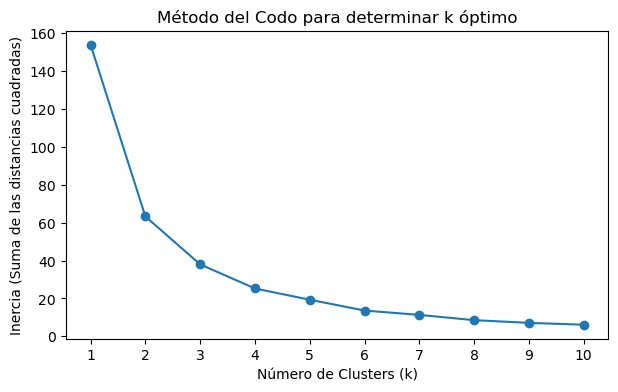

In [3]:
inertia = []
k_range = range(1, 11) # Probaremos con k desde 1 hasta 10

# Entrenamos el modelo K-Means para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.figure(figsize=(7, 4))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de las distancias cuadradas)')
plt.title('Método del Codo para determinar k óptimo')
plt.xticks(k_range)
plt.show()

Todo indica a que 3 es el numero mas optimo ahora desarrollemos los que falta del modelo

In [4]:
optimal_k = 3

# Creamos una instancia de KMeans con el número óptimo de clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

# Ajustamos el modelo a los datos escalados
kmeans_model.fit(df_scaled)

# Asignamos las etiquetas de cluster a nuestro DataFrame original
# para ver a qué grupo pertenece cada producto
df_burguer['Cluster'] = kmeans_model.labels_

# Mostramos el DataFrame con la nueva columna de cluster
print("DataFrame con la asignación de clusters (primeras 10 filas):")
print(df_burguer.head(10))

DataFrame con la asignación de clusters (primeras 10 filas):
   Calories  Cholesterol (mg)  Cluster
0     660.0              90.0        2
1     740.0             115.0        2
2     790.0             125.0        2
3     900.0             175.0        1
4     980.0             195.0        1
5    1130.0             255.0        1
6    1220.0             280.0        1
7     310.0              40.0        0
8    1150.0             240.0        1
9    1190.0             235.0        1


c:\Users\delhy.py\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


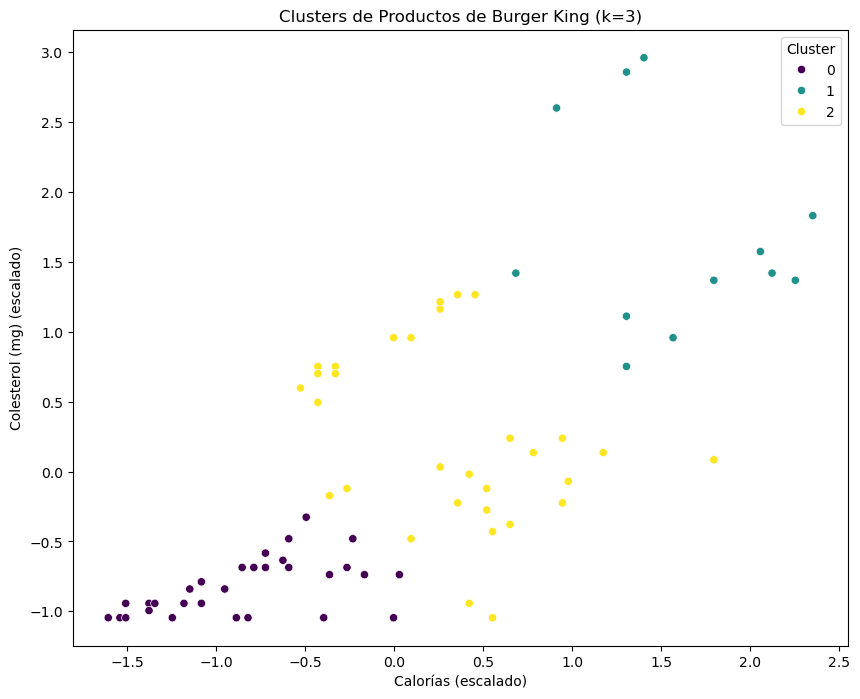

Veamos la hubicacion de los centroides de cada cluster


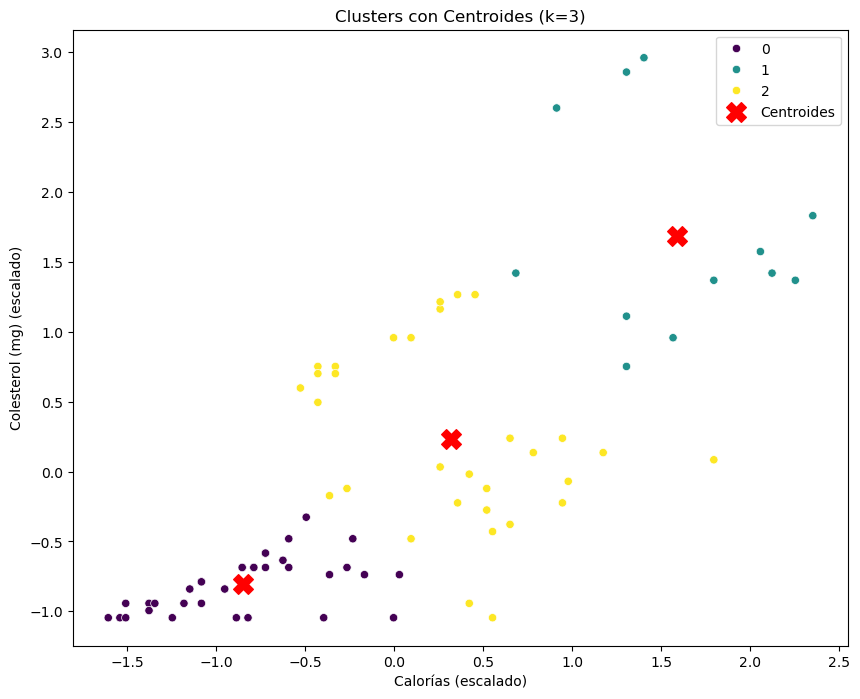

In [5]:
# Agregamos las etiquetas de cluster al DataFrame escalado para la visualización
df_scaled_df['Cluster'] = kmeans_model.labels_

# Creamos un scatterplot para visualizar los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Calories_scaled', y='Cholesterol_scaled', hue='Cluster', data=df_scaled_df, palette='viridis')
plt.title(f'Clusters de Productos de Burger King (k={optimal_k})')
plt.xlabel('Calorías (escalado)')
plt.ylabel('Colesterol (mg) (escalado)')
plt.show()


# También podemos ver los centroides de cada cluster (puntos centrales)
print("Veamos la hubicacion de los centroides de cada cluster")
centroids = kmeans_model.cluster_centers_
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Calories_scaled', y='Cholesterol_scaled', hue='Cluster', data=df_scaled_df, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title(f'Clusters con Centroides (k={optimal_k})')
plt.xlabel('Calorías (escalado)')
plt.ylabel('Colesterol (mg) (escalado)')
plt.legend()
plt.show()

In [6]:
# Calulamos las metricas 
silhouette_avg = silhouette_score(df_scaled, kmeans_model.labels_)
davies_bouldin_avg = davies_bouldin_score(df_scaled, kmeans_model.labels_)

print("| Métrica                  | Valor      |")
print("|:-------------------------|:-----------|")
print(f"| Coeficiente de Silueta   | {silhouette_avg:.4f}     |")
print(f"| Índice de Davies-Bouldin | {davies_bouldin_avg:.4f}     |")

| Métrica                  | Valor      |
|:-------------------------|:-----------|
| Coeficiente de Silueta   | 0.4658     |
| Índice de Davies-Bouldin | 0.8072     |


Ahora veamos una tabla resumen que nos ayudara a entender las metricas

| Métrica | Valor | Interpretación |
|:---|:---|:---|
| Coeficiente de Silueta | 0.4658 | Un valor positivo y relativamente alto (cercano a 0.5) indica que los clusters están bien separados y los puntos de datos son compactos dentro de sus respectivos grupos. |
| Índice de Davies-Bouldin | 0.8072 | Un valor bajo (menor a 1) indica una buena calidad de clustering, con clusters compactos y bien separados entre sí. |